In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Set random seed for reproducibility
tf.random.set_seed(42)


In [6]:

# Define constants
IMG_WIDTH, IMG_HEIGHT = 150, 150
BATCH_SIZE = 32


In [7]:
# Define paths to training and validation data
train_data_dir = '/content/drive/MyDrive/train'
validation_data_dir ='/content/drive/MyDrive/validation'

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [9]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [10]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary')


Found 1 images belonging to 2 classes.


In [11]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary')

Found 2 images belonging to 2 classes.


In [26]:

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
print(model)

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [16]:
# Calculate steps_per_epoch for training data
steps_per_epoch_train = len(train_generator) // BATCH_SIZE
if len(train_generator) % BATCH_SIZE > 0:
    steps_per_epoch_train += 1  # Add one more step for the remainder

# Calculate steps_per_epoch for validation data
steps_per_epoch_validation = len(validation_generator) // BATCH_SIZE
if len(validation_generator) % BATCH_SIZE > 0:
    steps_per_epoch_validation += 1  # Add one more step for the remainder

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_train,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation
)


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.6362 - accuracy: 1.0000 - val_loss: 0.8577 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 1s 513ms/step - loss: 0.1390 - accuracy: 1.0000 - val_loss: 2.5452 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 1s 585ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 5.7626 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 487ms/step - loss: 5.4970e-07 - accuracy: 1.0000 - val_loss: 9.9132 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 300ms/step - loss: 3.1114e-14 - accuracy: 1.0000 - val_loss: 14.9082 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 407ms/step - loss: 7.4813e-18 - accuracy: 1.0000 - val_loss: 20.5942 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 370ms/step - loss: 7.7502e-30 - accuracy: 1.0000 - val_loss: 26.8124 - val_accuracy: 0.5000
Epoc

In [17]:
model.save('cat_vs_dog_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


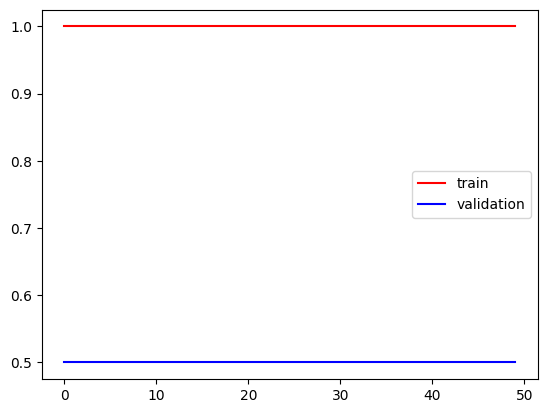

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


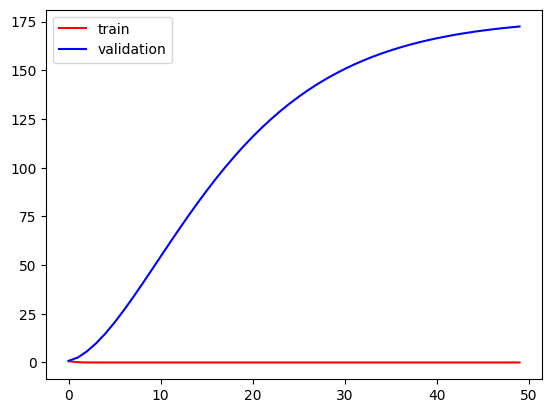

In [36]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


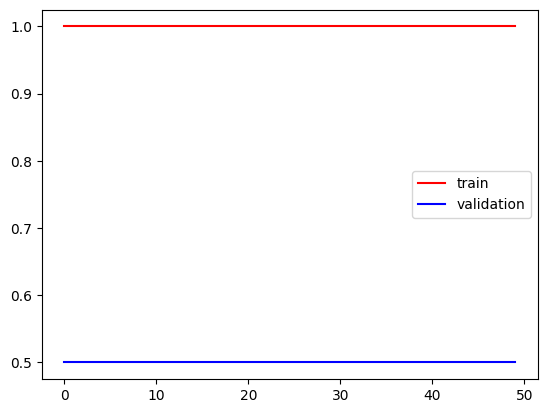

In [37]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



In [20]:
import cv2

In [21]:
test_img = cv2.imread('/content/dog2.jpg')

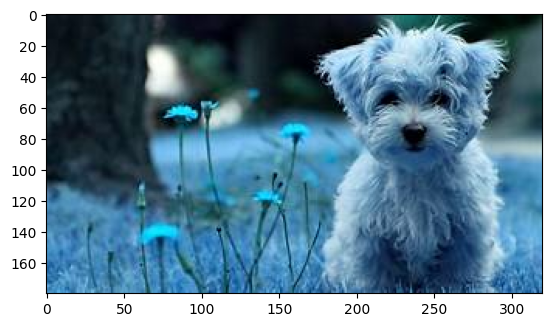

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(180, 320, 3)